<a href="https://colab.research.google.com/github/paul6598/AI_practice/blob/main/240414.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"joonhuk","key":"e081970db4687226c0d8f799ca080829"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle


In [3]:
!kaggle datasets download -d lovishbansal123/diamond-dataset

  0% 0.00/733k [00:00<?, ?B/s]
100% 733k/733k [00:00<00:00, 145MB/s]


In [4]:
!unzip -o /content/diamond-dataset.zip -d /content/data_set

Archive:  /content/diamond-dataset.zip
  inflating: /content/data_set/diamonds.csv  


In [5]:
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [6]:
data = pd.read_csv('/content/data_set/diamonds.csv')

In [7]:
print(data)

       Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
0               1   0.23      Ideal     E     SI2   61.5   55.0    326  3.95   
1               2   0.21    Premium     E     SI1   59.8   61.0    326  3.89   
2               3   0.23       Good     E     VS1   56.9   65.0    327  4.05   
3               4   0.29    Premium     I     VS2   62.4   58.0    334  4.20   
4               5   0.31       Good     J     SI2   63.3   58.0    335  4.34   
...           ...    ...        ...   ...     ...    ...    ...    ...   ...   
53935       53936   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75   
53936       53937   0.72       Good     D     SI1   63.1   55.0   2757  5.69   
53937       53938   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66   
53938       53939   0.86    Premium     H     SI2   61.0   58.0   2757  6.15   
53939       53940   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83   

          y     z  
0      3.98  2.43  

In [8]:
data.isnull().sum().sort_values() #결측치 확인

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [9]:
data = pd.get_dummies(data)

In [10]:
data

,Unnamed: 0,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1,0.23,61.5,55.0,326,3.95,3.98,2.43,False,False,...,False,False,False,False,False,True,False,False,False,False
1,2,0.21,59.8,61.0,326,3.89,3.84,2.31,False,False,...,False,False,False,False,True,False,False,False,False,False
2,3,0.23,56.9,65.0,327,4.05,4.07,2.31,False,True,...,False,False,False,False,False,False,True,False,False,False
3,4,0.29,62.4,58.0,334,4.20,4.23,2.63,False,False,...,True,False,False,False,False,False,False,True,False,False
4,5,0.31,63.3,58.0,335,4.34,4.35,2.75,False,True,...,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,60.8,57.0,2757,5.75,5.76,3.50,False,False,...,False,False,False,False,True,False,False,False,False,False
53936,53937,0.72,63.1,55.0,2757,5.69,5.75,3.61,False,True,...,False,False,False,False,True,False,False,False,False,False
53937,53938,0.70,62.8,60.0,2757,5.66,5.68,3.56,False,False,...,False,False,False,False,True,False,False,False,False,False
53938,53939,0.86,61.0,58.0,2757,6.15,6.12,3.74,False,False,...,False,False,False,False,False,True,False,False,False,False


In [11]:
data.iloc[:,8:] = data.iloc[:,8:].astype(int)

In [12]:
data

,Unnamed: 0,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,...,0,0,0,0,1,0,0,0,0,0
2,3,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,...,0,0,0,0,0,0,1,0,0,0
3,4,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,...,1,0,0,0,0,0,0,1,0,0
4,5,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,0,...,0,0,0,0,1,0,0,0,0,0
53936,53937,0.72,63.1,55.0,2757,5.69,5.75,3.61,0,1,...,0,0,0,0,1,0,0,0,0,0
53937,53938,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,53939,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,...,0,0,0,0,0,1,0,0,0,0


In [29]:
y = data.iloc[:,4].values
x = pd.concat([data.iloc[:,1:4], data.iloc[:,5:]], axis=1)

In [30]:
y

array([ 326,  326,  327, ..., 2757, 2757, 2757])

In [16]:
from sklearn.model_selection import train_test_split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

In [32]:
y_train

array([3592, 1110, 9898, ..., 1073,  758,  810])

In [28]:
type(y_test)

pandas.core.series.Series

In [21]:

model = Sequential()
model.add(Dense(10, input_dim = x_train.shape[1] ,activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                270       
                                                                 
 dense_1 (Dense)             (None, 256)               2816      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 32)                8224      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11343 (44.31 KB)
Trainable params: 11343 (

In [33]:
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mae']) #분류는 accuracy, 회귀는 mae

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

history = model.fit(x_train, y_train,
                    epochs = 1000,
                    validation_split = 0.25,
                    batch_size=64,
                    verbose=1,
                    callbacks = [early_stopping_callback])

Epoch 1/1000
506/506 [==============================] - 3s 4ms/step - loss: 983642.8750 - mae: 570.6535 - val_loss: 557611.0000 - val_mae: 465.4072
Epoch 2/1000
506/506 [==============================] - 3s 5ms/step - loss: 1029006.9375 - mae: 576.9835 - val_loss: 393412.7188 - val_mae: 341.4339
Epoch 3/1000
506/506 [==============================] - 2s 4ms/step - loss: 1018857.0625 - mae: 575.1870 - val_loss: 470458.7188 - val_mae: 381.6434
Epoch 4/1000
506/506 [==============================] - 2s 4ms/step - loss: 993231.1875 - mae: 568.7050 - val_loss: 387547.5625 - val_mae: 339.2262
Epoch 5/1000
506/506 [==============================] - 2s 4ms/step - loss: 994222.9375 - mae: 573.4981 - val_loss: 370773.1875 - val_mae: 335.4681
Epoch 6/1000
506/506 [==============================] - 2s 4ms/step - loss: 1023205.1875 - mae: 579.7108 - val_loss: 435665.9062 - val_mae: 375.8289
Epoch 7/1000
506/506 [==============================] - 2s 4ms/step - loss: 987592.8125 - mae: 568.7822 - val

In [ ]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c = 'red', label = 'value_loss')
plt.plot(x_len, y_loss, marker='.', c = 'blue', label = 'loss')

plt.legend(loc = 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [25]:
y_test[0]

KeyError: 0

338/338 [==============================] - 1s 3ms/step
실제가격: 1939.00, 예상가격: 2132.86, 오차율:10.0%
실제가격: 4805.00, 예상가격: 4014.05, 오차율:16.5%
실제가격: 3718.00, 예상가격: 3439.11, 오차율:7.5%
실제가격: 11888.00, 예상가격: 11029.24, 오차율:7.2%
실제가격: 9038.00, 예상가격: 8608.09, 오차율:4.8%
실제가격: 1133.00, 예상가격: 1165.35, 오차율:2.9%
실제가격: 10377.00, 예상가격: 9696.39, 오차율:6.6%
실제가격: 9071.00, 예상가격: 8777.09, 오차율:3.2%
실제가격: 6630.00, 예상가격: 6034.94, 오차율:9.0%
실제가격: 1807.00, 예상가격: 1534.44, 오차율:15.1%
실제가격: 4592.00, 예상가격: 3841.28, 오차율:16.3%
실제가격: 3145.00, 예상가격: 2987.04, 오차율:5.0%
실제가격: 855.00, 예상가격: 700.95, 오차율:18.0%
실제가격: 8518.00, 예상가격: 9451.31, 오차율:11.0%
실제가격: 14844.00, 예상가격: 13422.18, 오차율:9.6%
실제가격: 3612.00, 예상가격: 3892.16, 오차율:7.8%
실제가격: 956.00, 예상가격: 842.43, 오차율:11.9%
실제가격: 871.00, 예상가격: 773.67, 오차율:11.2%
실제가격: 2371.00, 예상가격: 1885.46, 오차율:20.5%
실제가격: 12224.00, 예상가격: 13258.44, 오차율:8.5%
실제가격: 5370.00, 예상가격: 4333.37, 오차율:19.3%
실제가격: 743.00, 예상가격: 613.63, 오차율:17.4%
실제가격: 4215.00, 예상가격: 3243.17, 오차율:23.1%
실제가격: 10165.00, 예상가격: 10307.51, 오차율:1

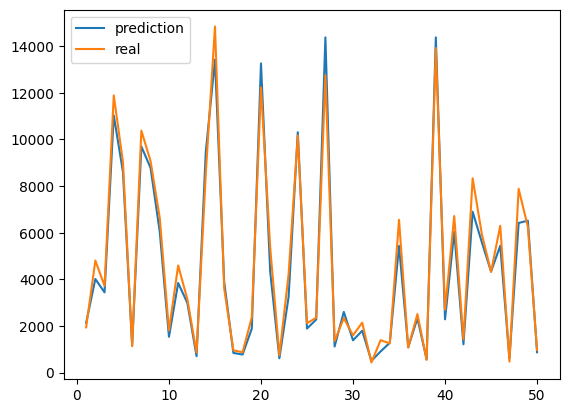

In [35]:
real_price = []
pred_price = []
x_num = []

n_iter = 0
y_prediction = model.predict(x_test).flatten()
for i in range(50):
  real = y_test[i]
  pred = y_prediction[i]
  real_price.append(real)
  pred_price.append(pred)
  error_ratio = abs(100*(real-pred)/real)
  print("실제가격: {:.2f}, 예상가격: {:.2f}, 오차율:{:.1f}%".format(real, pred, error_ratio))
  n_iter += 1
  x_num.append(n_iter)

plt.plot(x_num, pred_price, label = 'prediction')
plt.plot(x_num, real_price, label = 'real')
plt.legend()
plt.show()